In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [5]:
df = pd.read_csv("bank-additional-full.csv",delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

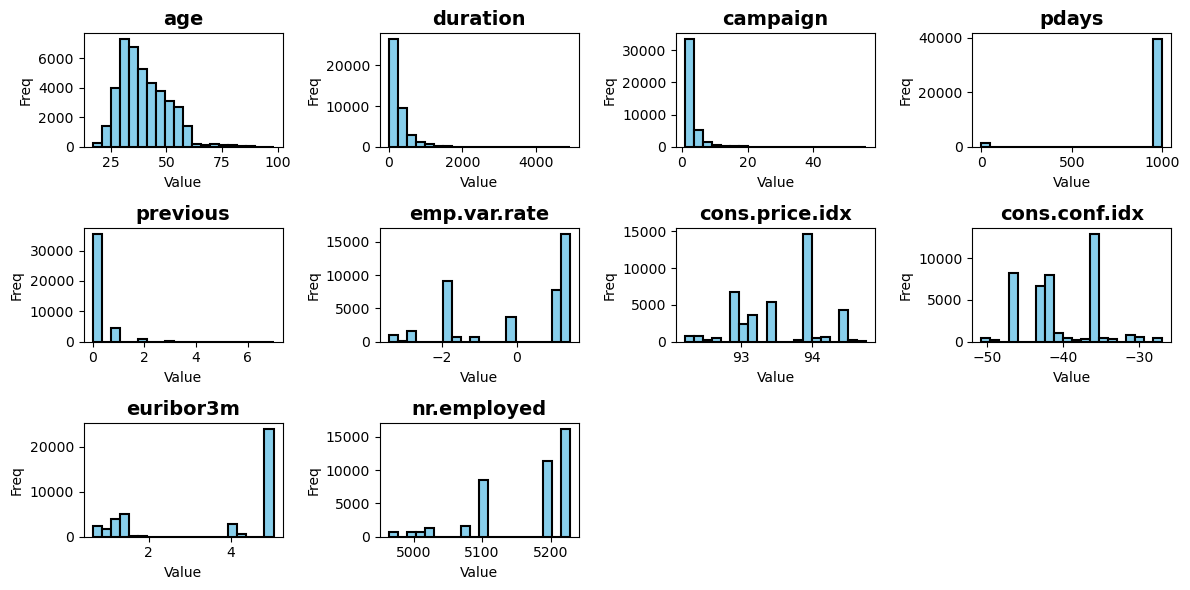

In [33]:
#Frequency Hist
numerical_columns=["age","duration","campaign","pdays","previous","emp.var.rate",
                   "cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]
plt.figure(figsize=(12,6))
for i,column in enumerate(numerical_columns,1):
    #print(i,column) #10
    plt.subplot(3,4,i)
    plt.hist(df[column],bins=20,color="skyblue",edgecolor="black",linewidth=1.5)
    plt.title(column,fontsize=14,fontweight="bold")
    plt.xlabel("Value")
    plt.ylabel("Freq")

plt.tight_layout() #避免重叠
plt.show()

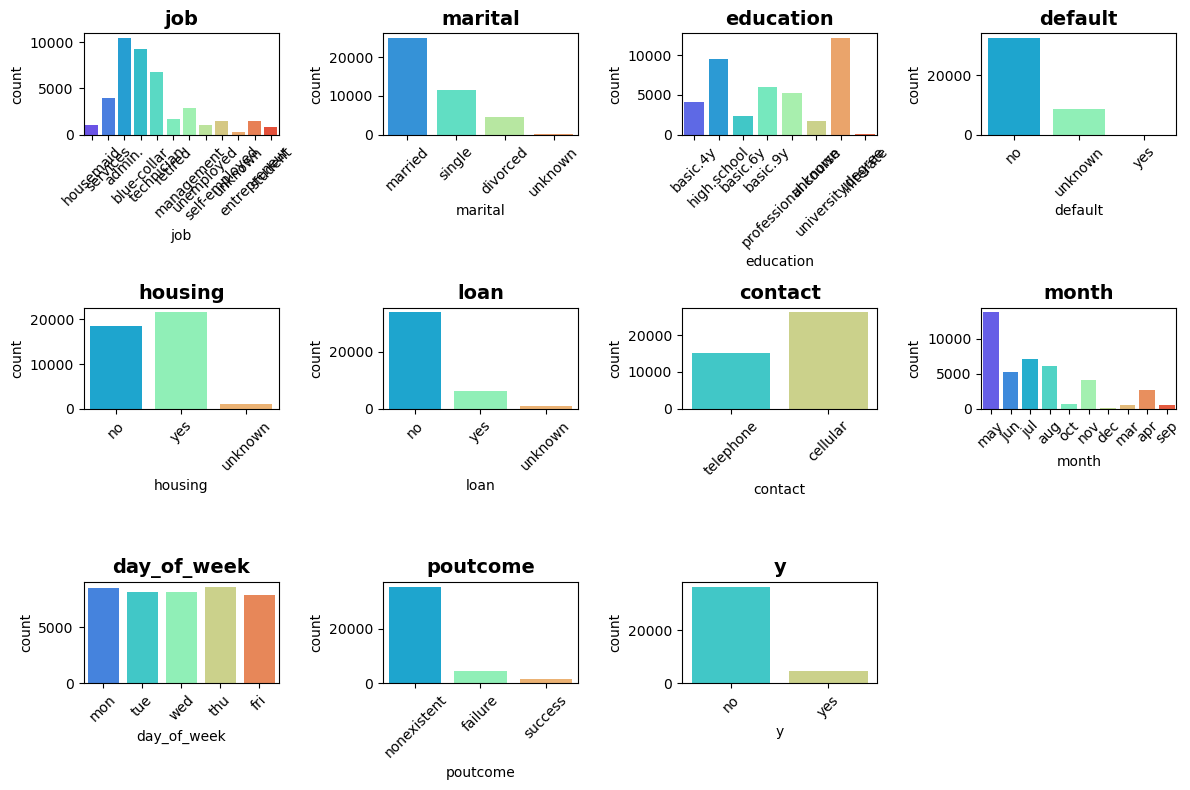

In [47]:
#
categorical_columns=["job","marital","education","default","housing","loan",
                    "contact","month","day_of_week","poutcome","y"]
#len(categorical_columns)==>11
plt.figure(figsize=(12,8))
for i,column in enumerate(categorical_columns,1):
    plt.subplot(3,4,i)
    sns.countplot(data=df,x=column,palette="rainbow")
    plt.title(column,fontsize=14,fontweight="bold")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [34]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [35]:
df.isnull().sum() #missing values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

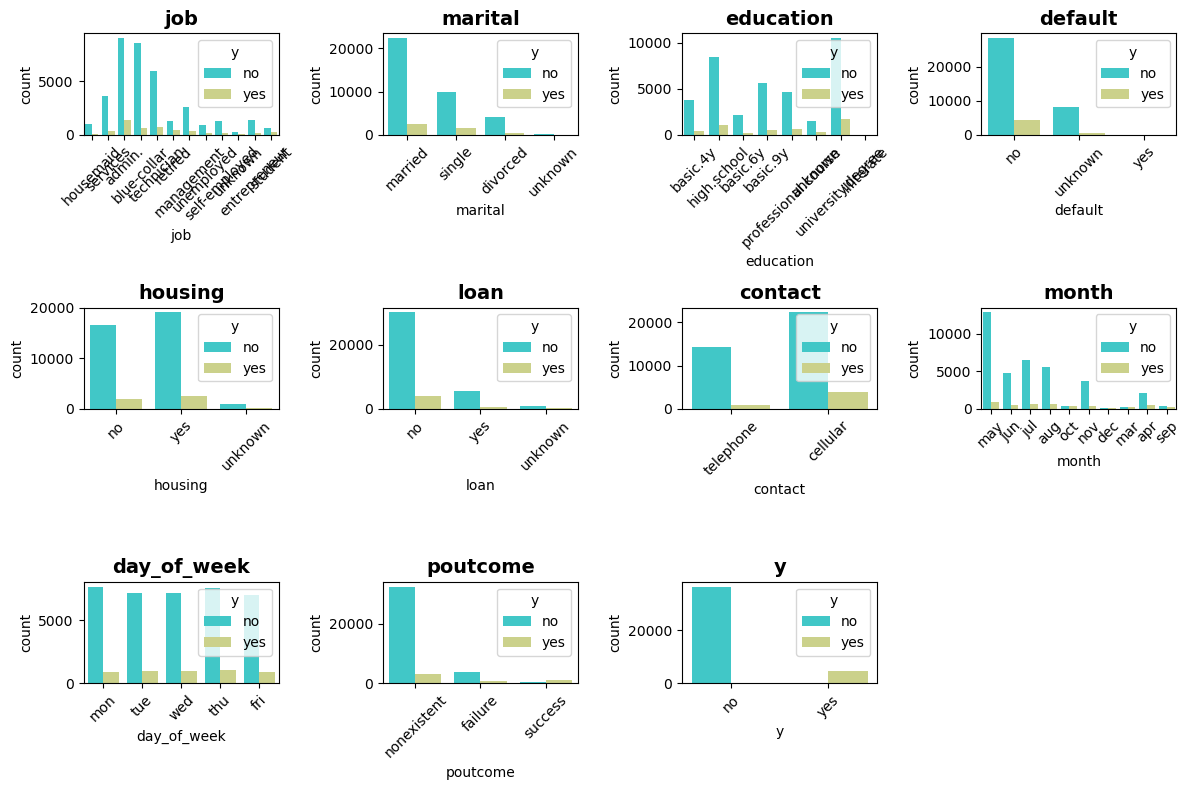

In [37]:
plt.figure(figsize=(12,8))
for i,column in enumerate(categorical_columns,1):
    plt.subplot(3,4,i)
    sns.countplot(data=df,x=column,hue="y",palette="rainbow") #hue
    plt.title(column,fontsize=14,fontweight="bold")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

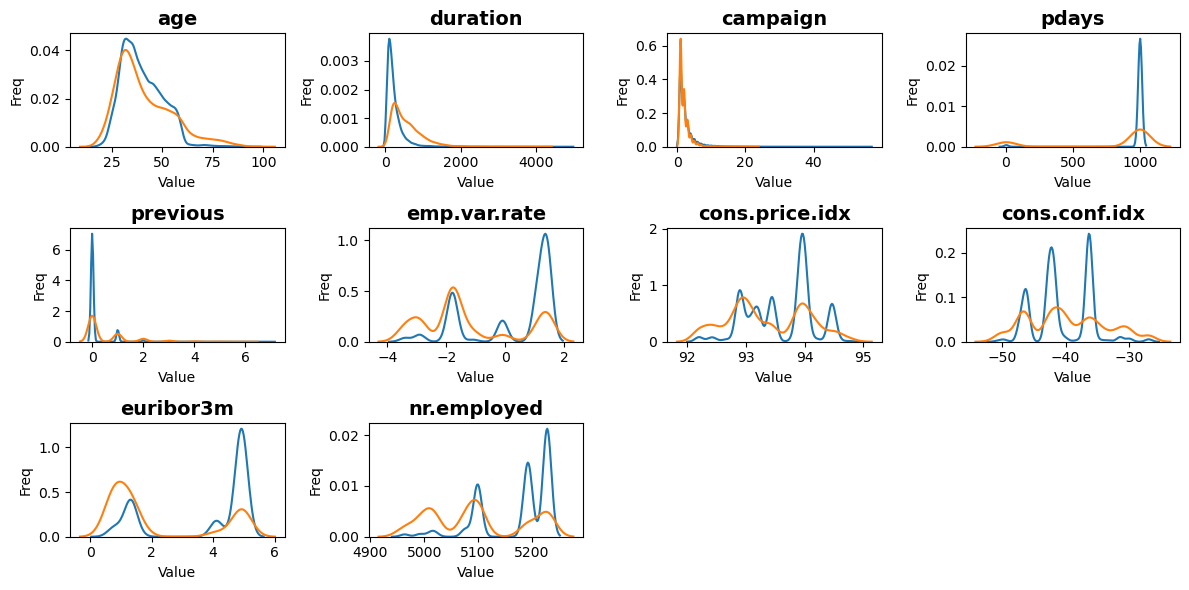

In [63]:
plt.figure(figsize=(12,6))
for i,column in enumerate(numerical_columns,1):
    #print(i,column) #10
    plt.subplot(3,4,i)
    #sns.displot(x="y",y=column,data=df,palette="rainbow")
    sns.kdeplot(x=df[(df["y"]=="no")][column])
    sns.kdeplot(x=df[(df["y"]=="yes")][column])
    plt.title(column,fontsize=14,fontweight="bold")
    plt.xlabel("Value")
    plt.ylabel("Freq")

plt.tight_layout() #避免重叠
plt.show()

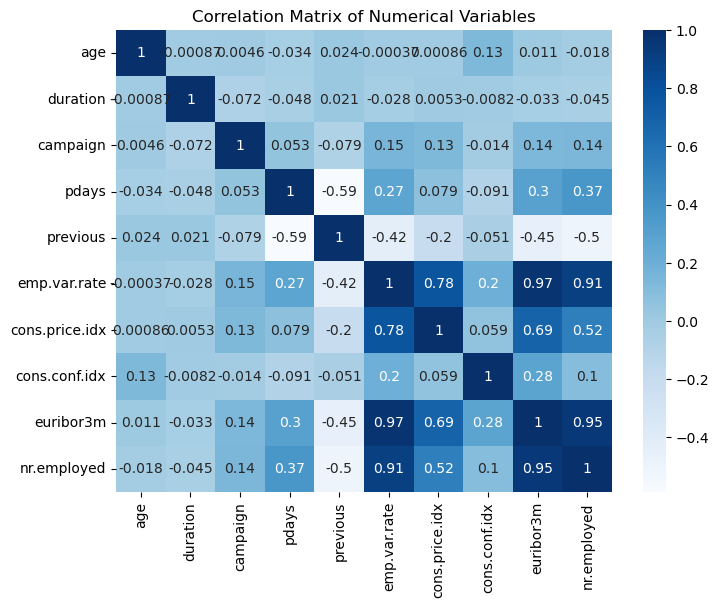

In [64]:
#correlation
corr_matrix=df[numerical_columns].corr()

#plot
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap="Blues")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

In [68]:
#Data Proccessing
label_encoder=LabelEncoder() #编码
for column in categorical_columns:
    df[column]=label_encoder.fit_transform(df[column]) 

#df.head()
scaler=StandardScaler()
df[numerical_columns]=scaler.fit_transform(df[numerical_columns])

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,3,1,0,0,0,0,1,6,1,...,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
1,1.628993,7,1,3,1,0,0,1,6,1,...,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
2,-0.290186,7,1,3,0,2,0,1,6,1,...,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
3,-0.002309,0,1,1,0,0,0,1,6,1,...,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
4,1.533034,7,1,3,0,0,2,1,6,1,...,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0


In [70]:
#Split
x=df.drop(columns=["y"])
y=df["y"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print("Training set shape",x_train.shape,y_train.shape)
print("Testing set shape",x_test.shape,y_test.shape)

Training set shape (30891, 20) (30891,)
Testing set shape (10297, 20) (10297,)


In [72]:
#Random Foreast 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred_rf=rf.predict(x_test)

accuracy_rf=accuracy_score(y_test,y_pred_rf)
print("Accuracy:",accuracy_rf)

Accuracy: 0.9162862969797029


Text(20.72222222222222, 0.5, 'True')

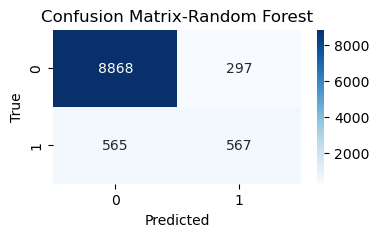

In [73]:
cm_rf=confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(4,2))
sns.heatmap(cm_rf,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix-Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")

In [74]:
#Feature importances
fi_rf=rf.feature_importances_
df_fi_rf=pd.DataFrame({"Feature":x_train.columns,"Importances":fi_rf})
df_fi_rf=df_fi_rf.sort_values(by="Importances",ascending=False)
print("Random Forest Feature Importances")
print(df_fi_rf)

Random Forest Feature Importances
           Feature  Importances
10        duration     0.311805
18       euribor3m     0.104262
0              age     0.090925
19     nr.employed     0.063688
1              job     0.048736
3        education     0.043574
11        campaign     0.042805
9      day_of_week     0.041881
12           pdays     0.039842
14        poutcome     0.029566
17   cons.conf.idx     0.028919
2          marital     0.023961
16  cons.price.idx     0.023152
15    emp.var.rate     0.020578
5          housing     0.020465
8            month     0.018946
6             loan     0.015545
13        previous     0.012969
7          contact     0.009904
4          default     0.008478


<Axes: xlabel='Feature', ylabel='Importances'>

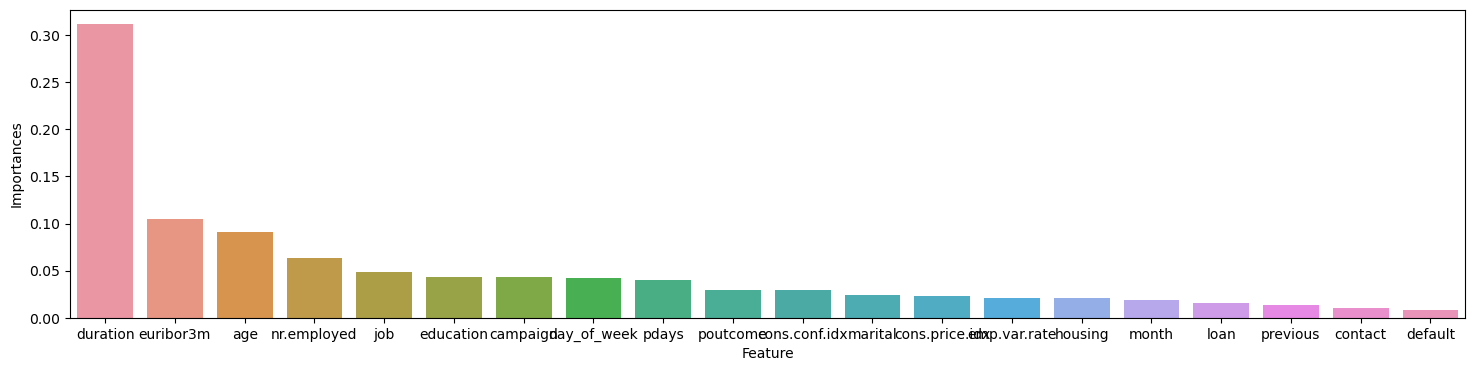

In [83]:
#Visualization RF
plt.figure(figsize=(18,4))
sns.barplot(x=df_fi_rf["Feature"],y=df_fi_rf["Importances"])